In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



In [3]:
data = {
 'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'Passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
# Independent variable (feature) and dependent variable (target)
X = df[['Hours_Studied']]
y = df['Passed']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [4]:
# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Making predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)

Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

ROC-AUC: 1.0


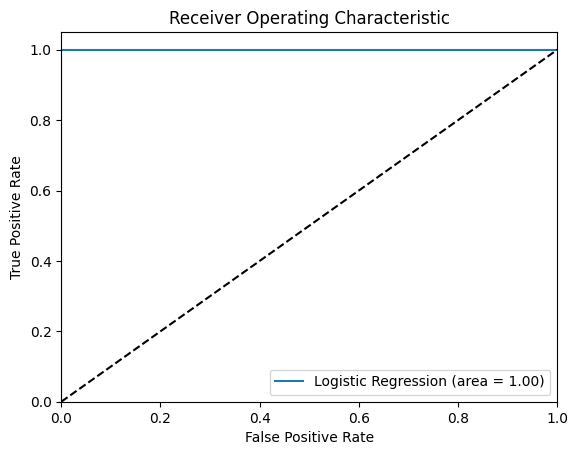

In [5]:
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC: {roc_auc}")
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 2.2 Explanation of the Code
# 1. Libraries: We import necessary libraries like numpy, pandas, sklearn, and matplotlib.
# 2. Data Preparation: We create a DataFrame containing the hours studied and whether the student
# passed.
# 3. Feature and Target: We separate the feature (Hours_Studied) and the target (Passed).
# 4. Train-Test Split: We split the data into training and testing sets.
# 5. Model Training: We create a LogisticRegression model and train it using the training data.
# 6. Predictions: We use the trained model to predict the pass/fail outcome for the test set and also
# obtain the predicted probabilities.
# 7. Evaluation: We evaluate the model using the confusion matrix, classification report, and ROC-AUC
# score.
# 7
# 8. Visualization: We plot the ROC curve to visualize the model's performance.
# 2.3 Evaluation Metrics
# - Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false
# negatives.
# - Classification Report: Provides precision, recall, F1-score, and support for each class.
# - ROC-AUC: Measures the model's ability to distinguish between the classes. AUC (Area Under the Curve)
# closer to 1 indicates better performance.
